In [1]:
!. ../.venv/bin/activate
import pandas as pd
import numpy as np
import mygraph as mg

In [2]:
N0 = {
  "Al": [232685, 230436, 228510],
  "Fe": [214903, 214490, 214679],
  "Pb": [216202, 215654, 214457, 214841]
}
t = 10 # s
N0Al = np.mean(N0['Al']) / t
N0Fe = np.mean(N0['Fe']) / t
N0Pb = np.mean(N0['Pb']) / t
N0Al, N0Fe, N0Pb

(np.float64(23054.366666666665),
 np.float64(21469.066666666666),
 np.float64(21528.85))

In [3]:
dfAl = pd.read_csv('Al.csv', sep='\t')
dfFe = pd.read_csv('Fe.csv', sep='\t')
dfPb = pd.read_csv('Pb.csv', sep='\t')

dfAl['Per second'] = dfAl['N'] / dfAl['t']
dfFe['Per second'] = dfFe['N'] / dfFe['t']
dfPb['Per second'] = dfPb['N'] / dfPb['t']
dfPb

,n,N,t,Per second
0,1,116885,10,11688.500000
1,2,66332,10,6633.200000
2,3,38517,10,3851.700000
3,4,22686,10,2268.600000
4,5,12762,10,1276.200000
5,6,11304,15,753.600000
6,7,11283,20,564.150000
7,8,10532,35,300.914286
8,9,11962,60,199.366667
9,10,14344,100,143.440000


In [4]:
N_background = 11031
t_background = 5 * 60 #s
N_background_perS = N_background / t_background

lenAl = 20 # mm
lenFe = 9.9 # mm
lenPb = 4.15 # mm
lenPlug = 19.4 # mm
N_background_perS

36.77

Коэффиценты прямой: k, s_k, b, s_b
0.020681, 0.0002675, 0.069202, 0.009137


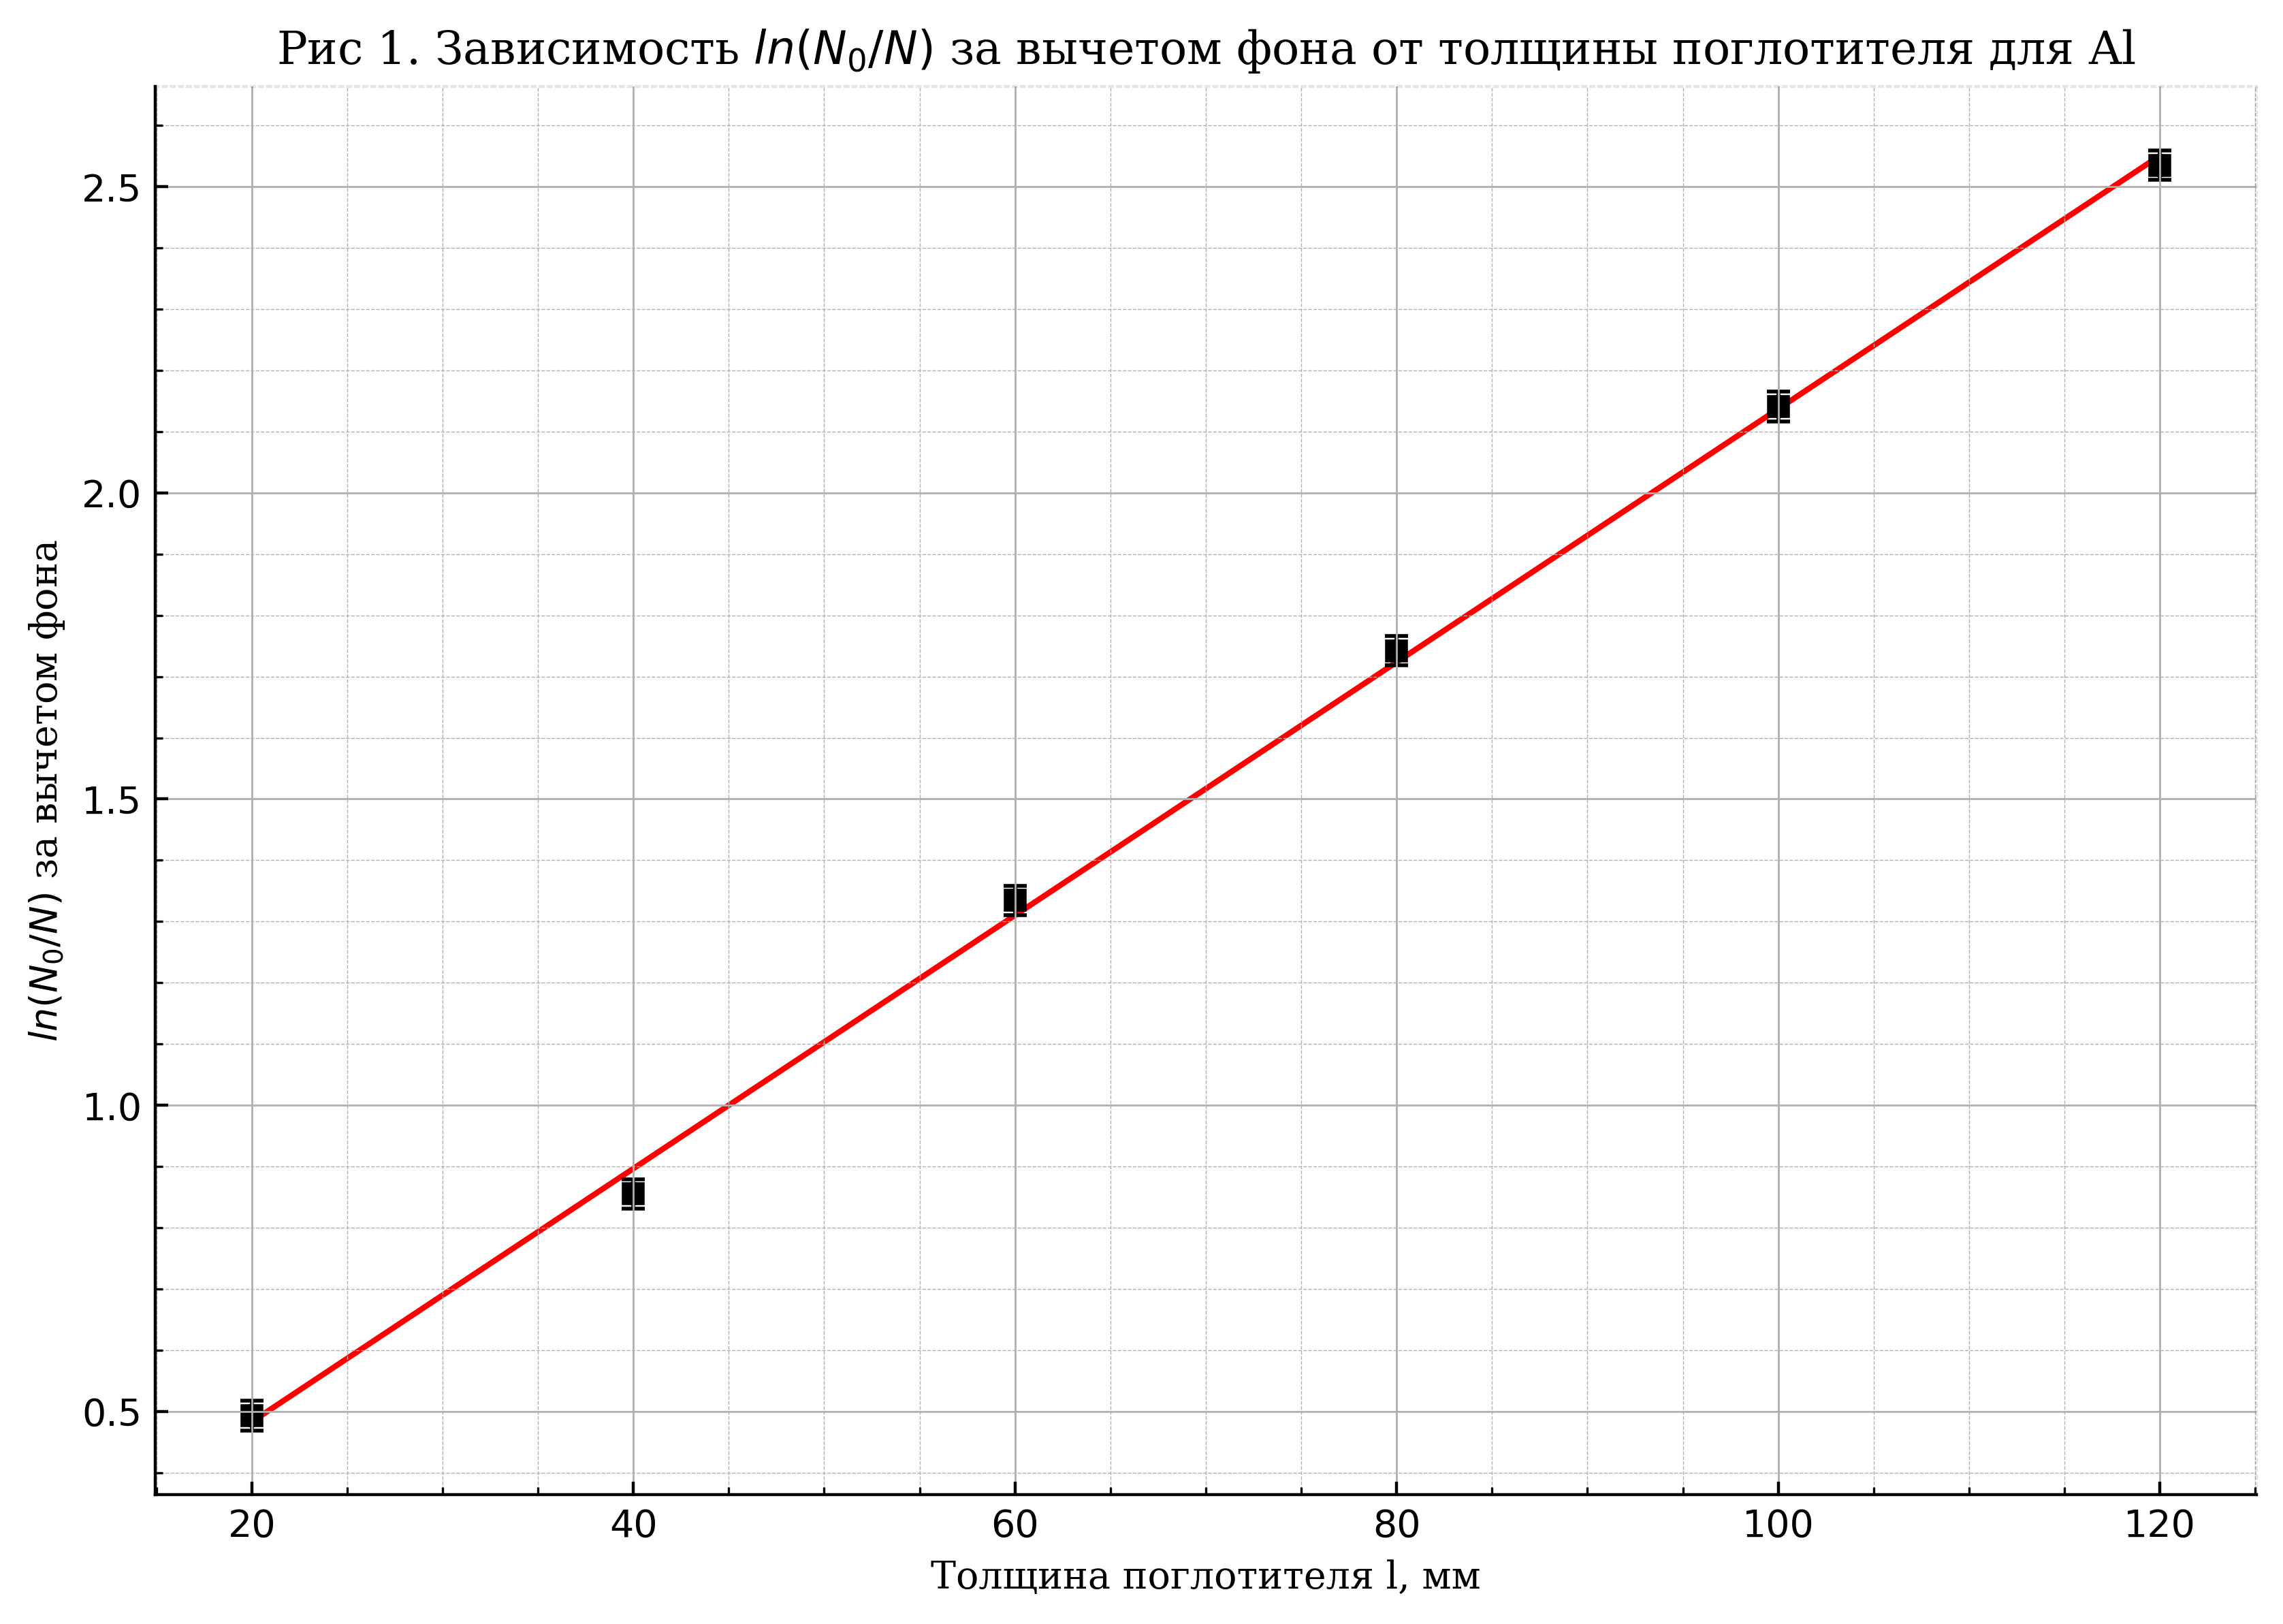

In [5]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость $ln(N_0/N)$ за вычетом фона от толщины поглотителя для Al')
mg.set_label(ax, 'Толщина поглотителя l, мм', '$ln(N_0/N)$ за вычетом фона')

X = lenAl * dfAl['n']
X = np.array( X )
#Y = np.log(dfAl['Per second'] - N_background_perS)
Y = np.log( (N0Al - N_background_perS)/(dfAl['Per second'] - N_background_perS) )
Y = np.array( Y )

N0N = N0Al/dfAl['Per second']
s_N0 = np.sqrt(N0Al)
s_N = np.sqrt(dfAl['Per second'])
sigma = np.sqrt( np.square(s_N0 / dfAl['Per second']) + np.square(N0Al*s_N/dfAl['Per second']/dfAl['Per second']) )
y_e = sigma/N0N

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y, x_err=0.05, y_err=max(y_e))
mg.display_linls(ax)

Коэффиценты прямой: k, s_k, b, s_b
0.056896, 0.00022111, 0.051342, 0.0050156


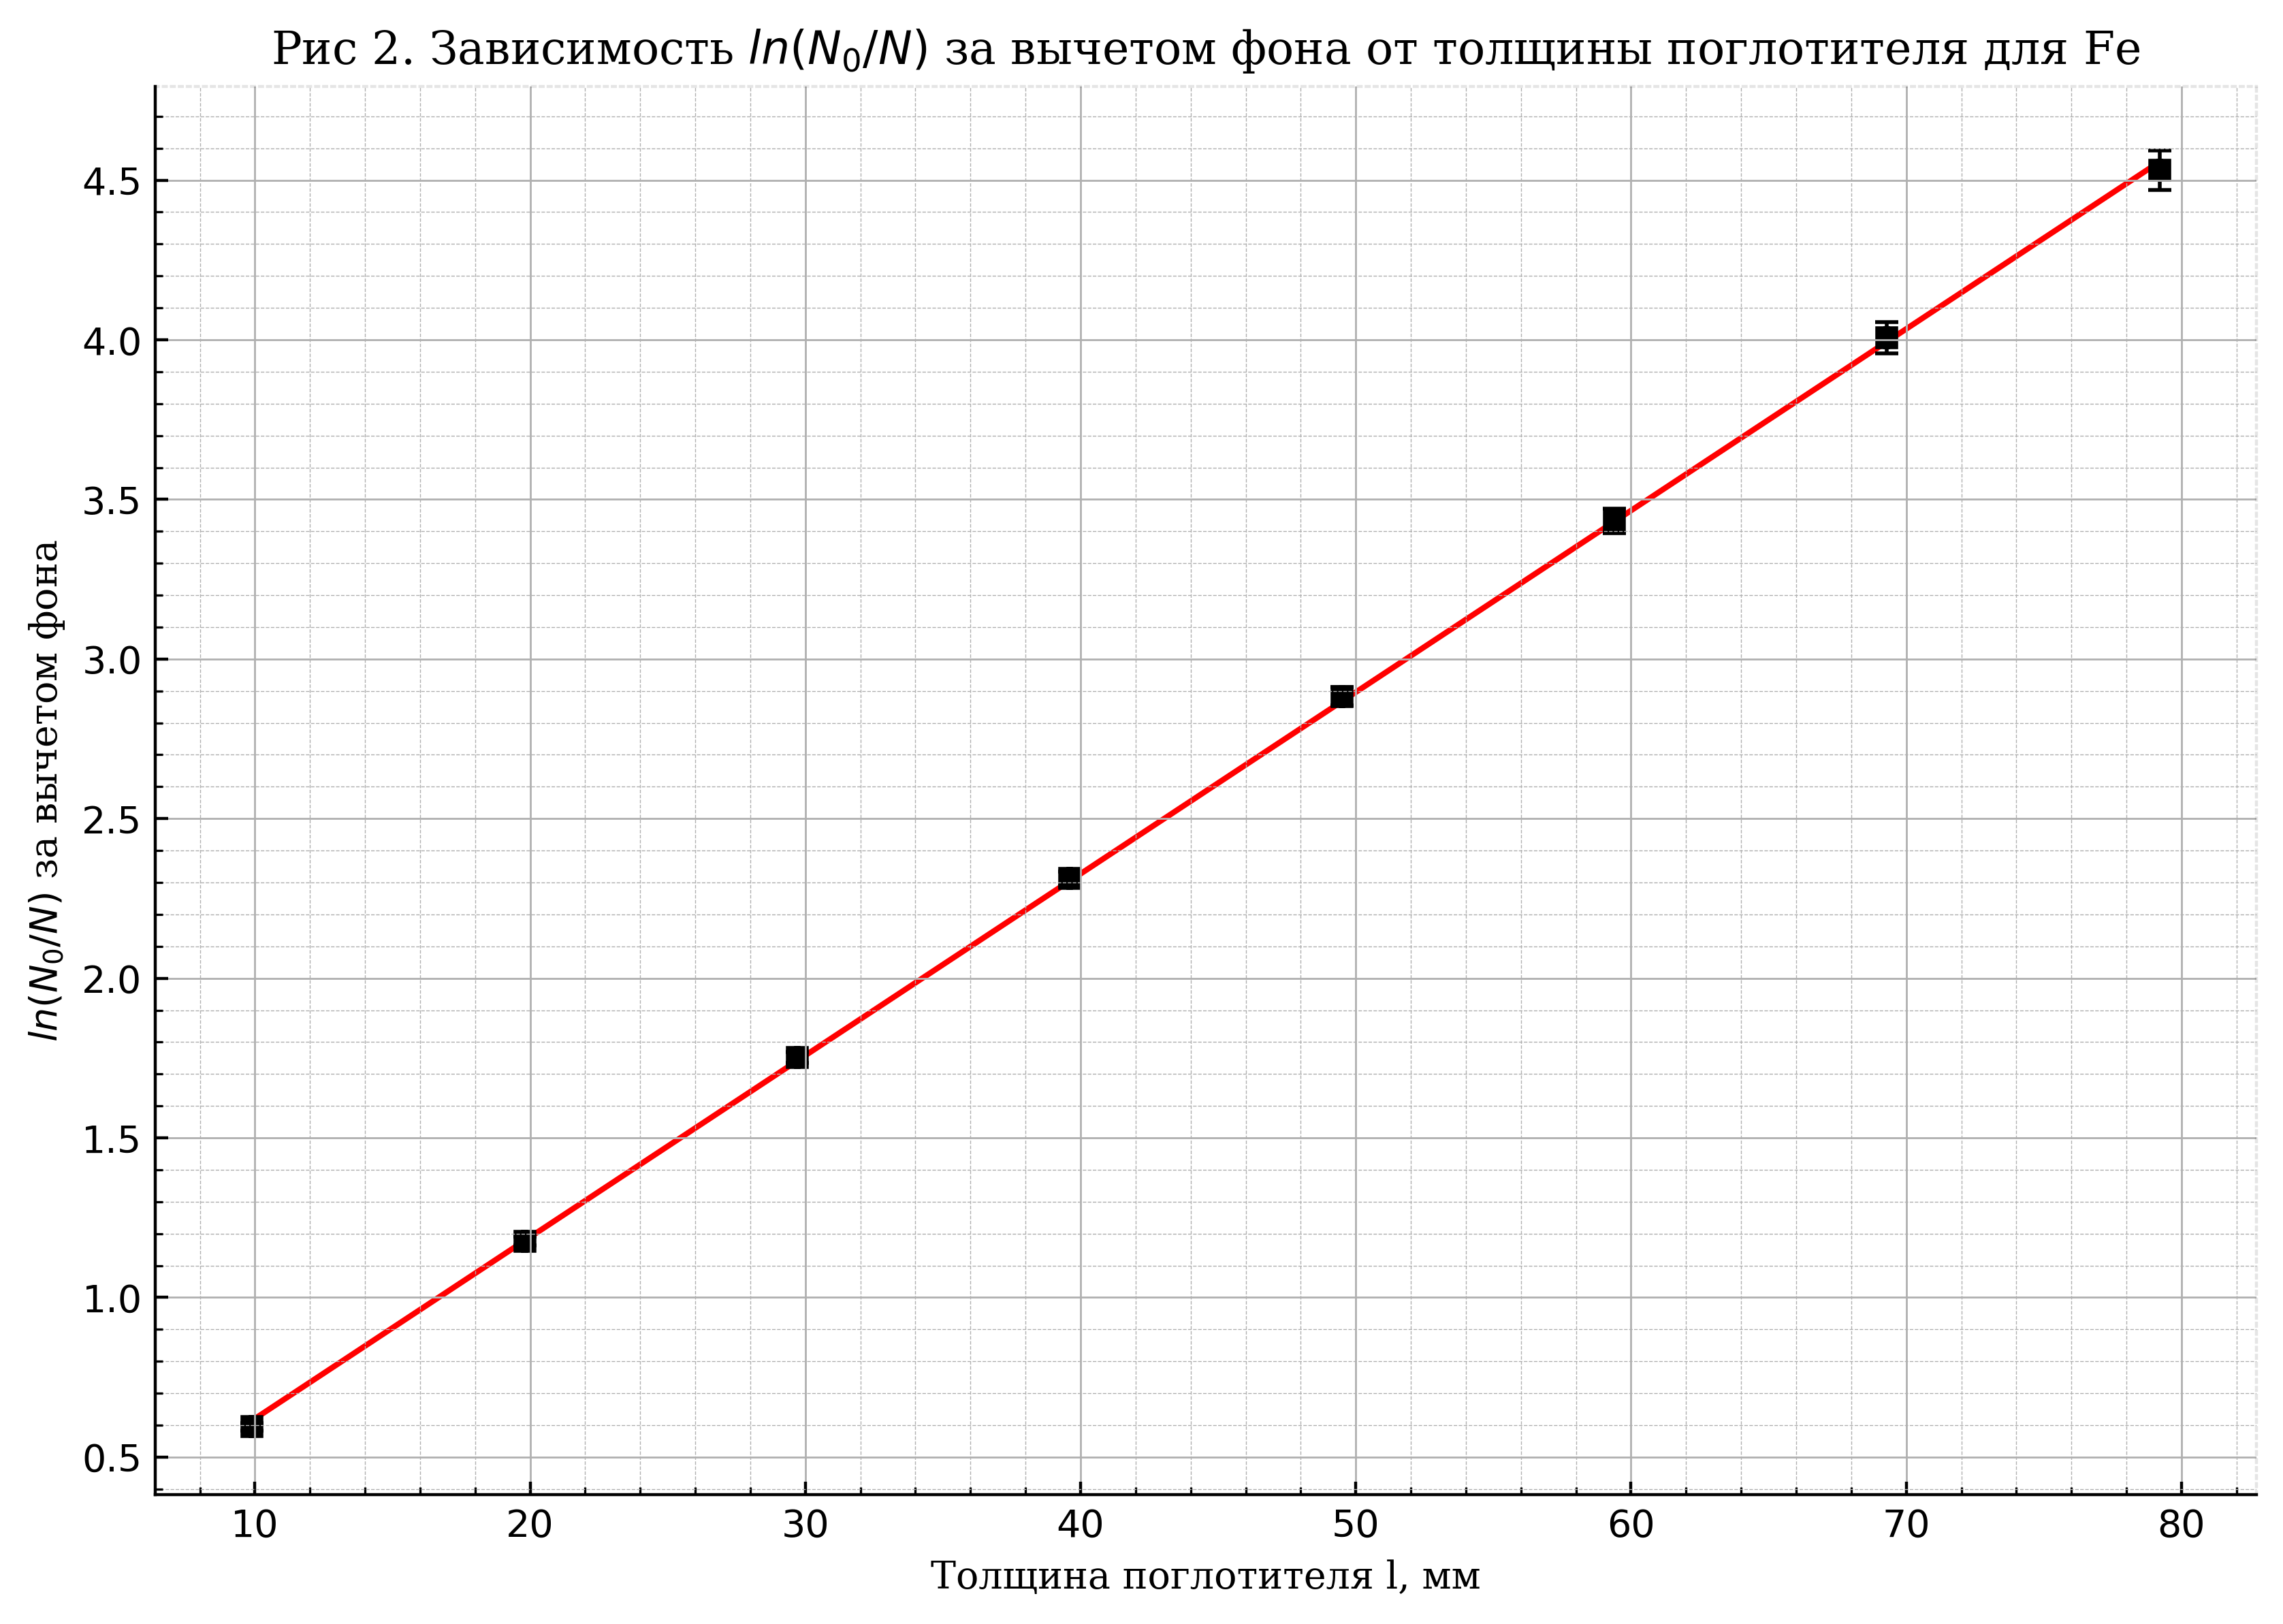

In [6]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость $ln(N_0/N)$ за вычетом фона от толщины поглотителя для Fe')
mg.set_label(ax, 'Толщина поглотителя l, мм', '$ln(N_0/N)$ за вычетом фона')

X = np.array( lenFe * dfFe['n'] )
#Y = np.array( np.log(dfFe['Per second'] - N_background_perS) )
Y = np.log( (N0Fe - N_background_perS)/(dfFe['Per second'] - N_background_perS) )
Y = np.array( Y ) 

N0N = N0Fe/dfFe['Per second']
s_N0 = np.sqrt(N0Fe)
s_N = np.sqrt(dfFe['Per second'])
sigma = np.sqrt( np.square(s_N0 / dfFe['Per second']) + np.square(N0Fe*s_N/dfFe['Per second']/dfFe['Per second']) )
y_e = sigma/N0N


k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y, x_err=0.05, y_err=y_e)
mg.display_linls(ax)

Коэффиценты прямой: k, s_k, b, s_b
0.12616, 0.0017915, 0.15407, 0.021354


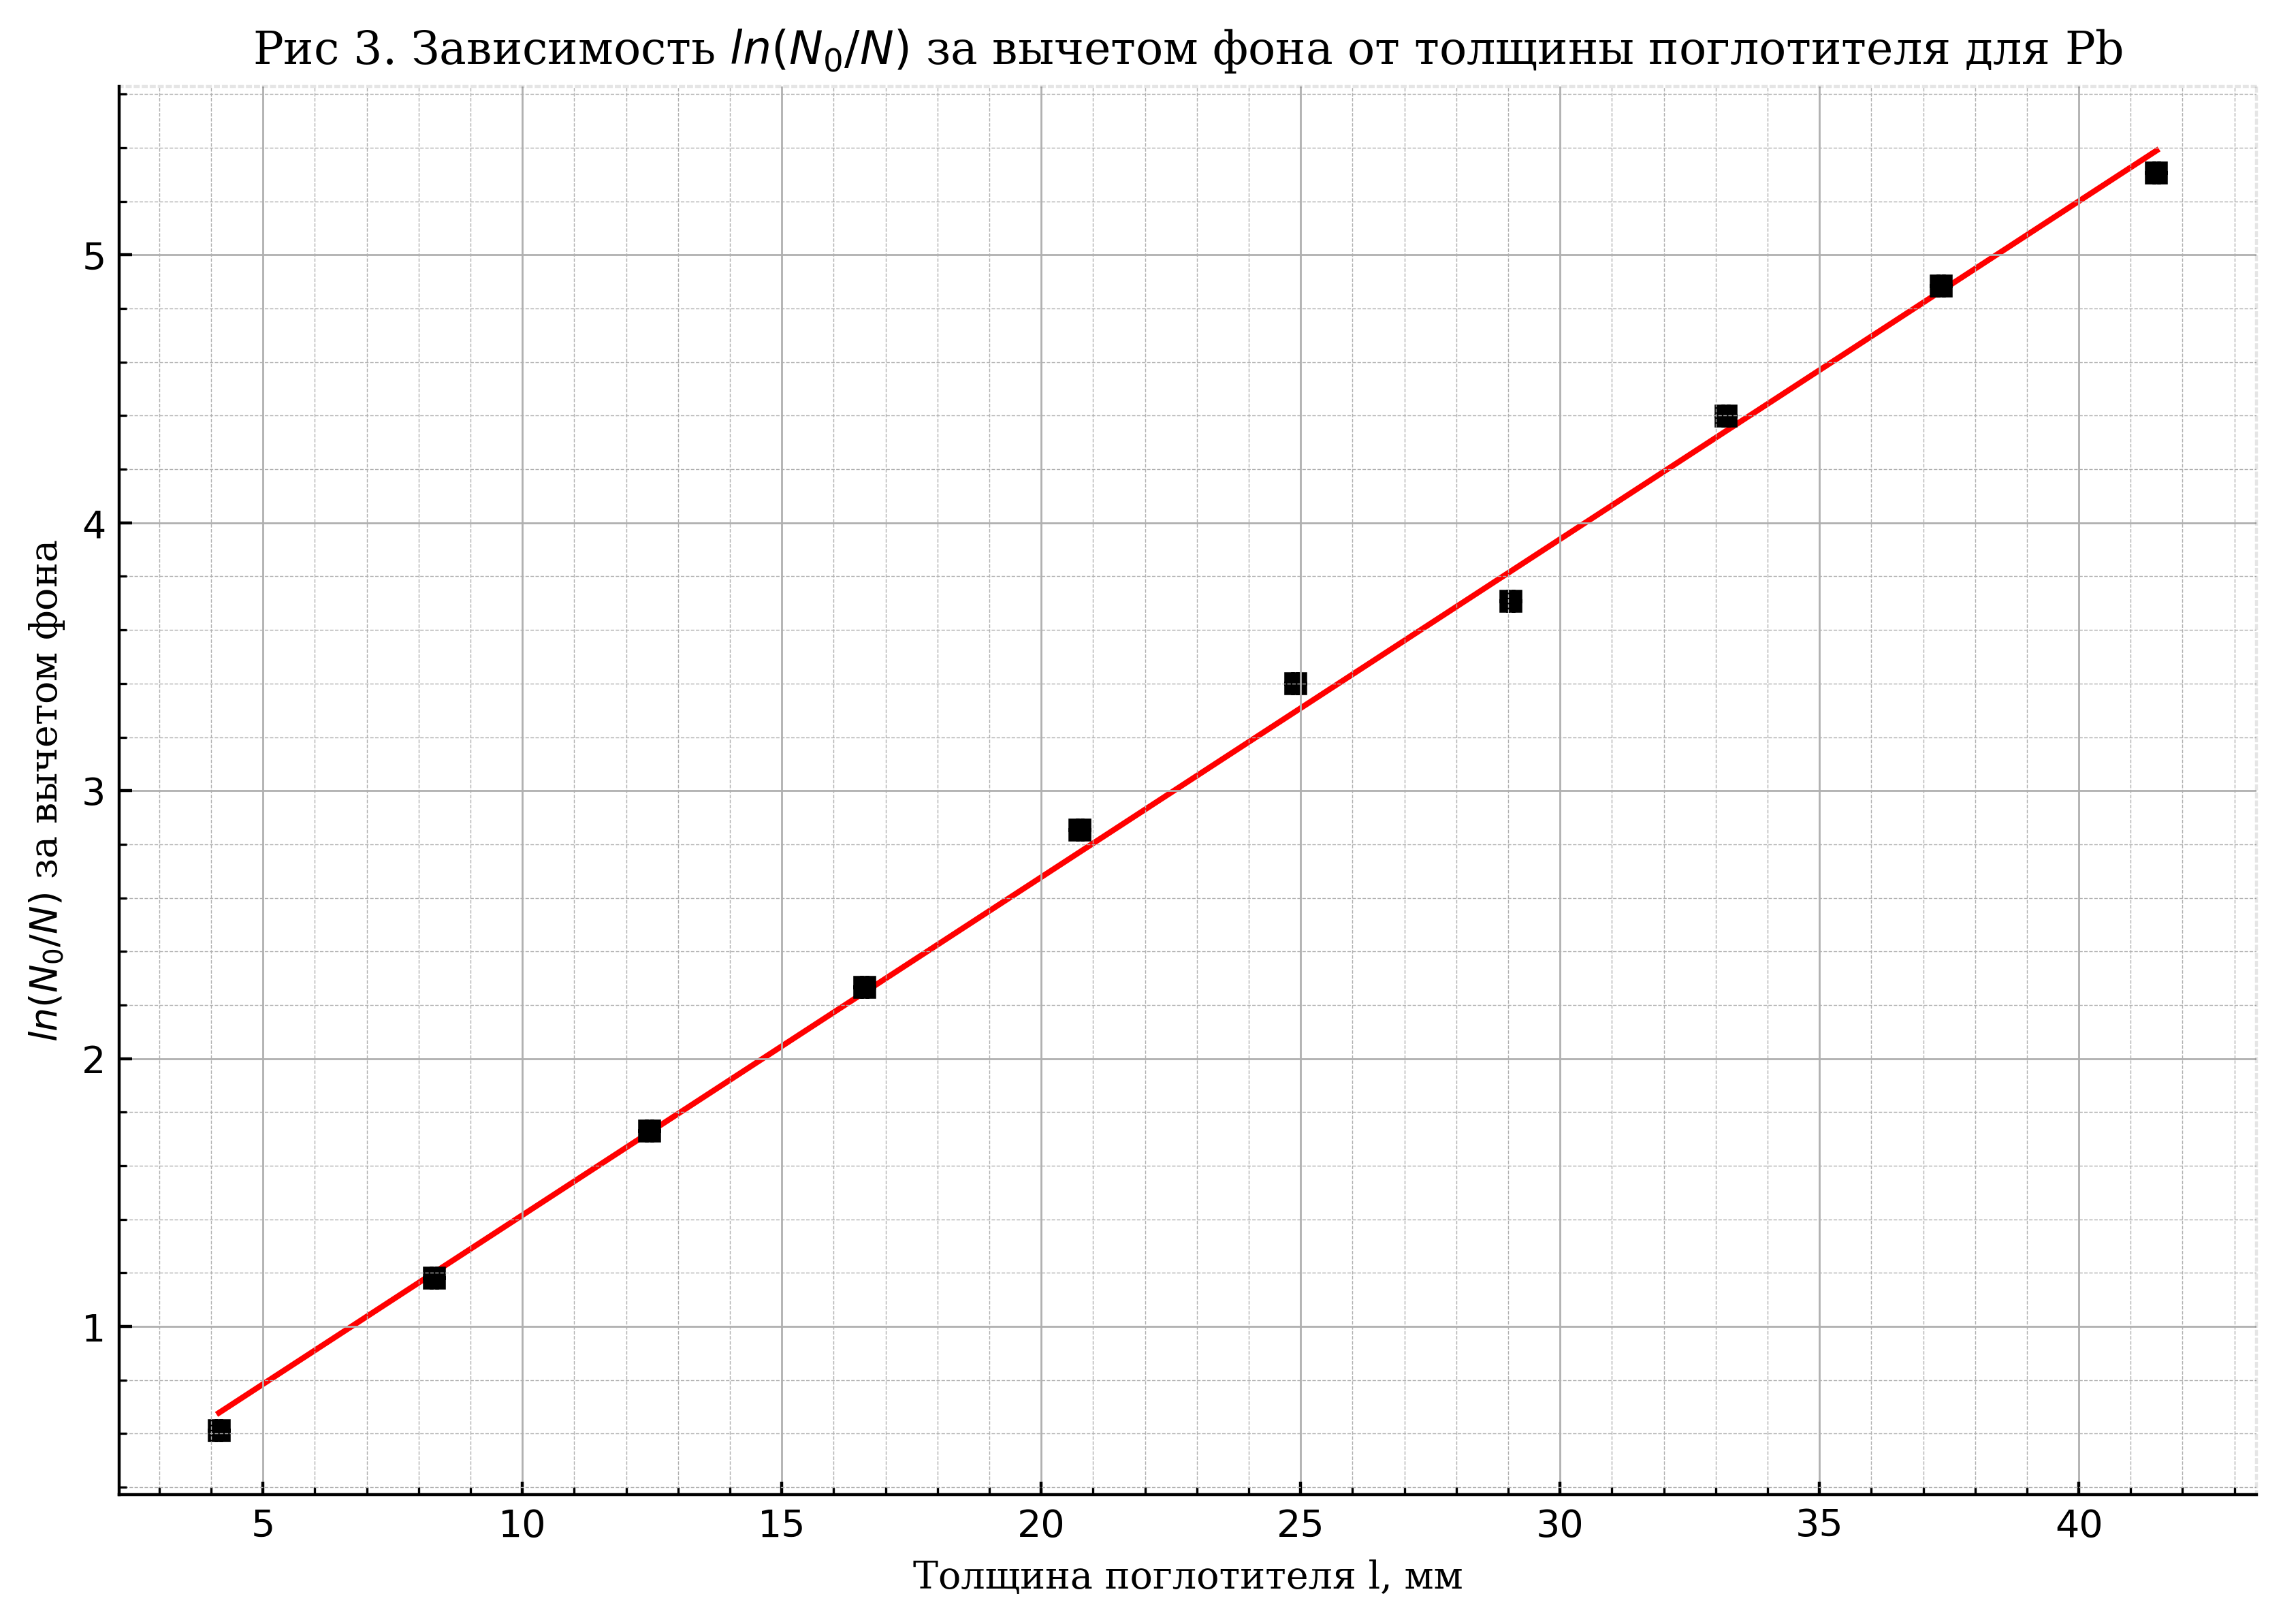

In [7]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость $ln(N_0/N)$ за вычетом фона от толщины поглотителя для Pb')
mg.set_label(ax, 'Толщина поглотителя l, мм', '$ln(N_0/N)$ за вычетом фона')

X = np.array( lenPb * dfPb['n'] )
#Y = np.array( np.log(dfPb['Per second'] - N_background_perS) )
Y = np.log( (N0Pb - N_background_perS)/(dfPb['Per second'] - N_background_perS) )
Y = np.array( Y ) 

N0N = N0Pb/dfPb['Per second']
s_N0 = np.sqrt(N0Pb)
s_N = np.sqrt(dfPb['Per second'])
sigma = np.sqrt( np.square(s_N0 / dfPb['Per second']) + np.square(N0Pb*s_N/dfPb['Per second']/dfPb['Per second']) )
y_e = sigma/N0N

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y, x_err=0.05)
mg.display_linls(ax)